In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
df = pd.read_csv('../data/processed/preprocessed_080321.csv')
df

Index(['floor_area_sqm', 'latitude', 'longitude', 'resale_price',
       'price_per_area', 'lease_duration', 'storey', 'flat_type_ord',
       'flat_model_adjoined flat', 'flat_model_apartment', 'flat_model_dbss',
       'flat_model_improved', 'flat_model_improved maisonette',
       'flat_model_maisonette', 'flat_model_model a',
       'flat_model_model a maisonette', 'flat_model_model a2',
       'flat_model_multi generation', 'flat_model_new generation',
       'flat_model_premium apartment', 'flat_model_premium apartment loft',
       'flat_model_premium maisonette', 'flat_model_simplified',
       'flat_model_standard', 'flat_model_terrace', 'flat_model_type s1',
       'flat_model_type s2', 'town_bedok', 'town_bishan', 'town_bukit batok',
       'town_bukit merah', 'town_bukit panjang', 'town_bukit timah',
       'town_central area', 'town_choa chu kang', 'town_clementi',
       'town_geylang', 'town_hougang', 'town_jurong east', 'town_jurong west',
       'town_kallang/whampoa',

In [8]:
psch = pd.read_csv('../data/processed/psc-ranked-dist-matrix2.csv')
psch

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431728,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
431729,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
431730,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
rank = pd.read_csv("../data/processed/psch-ranked.csv")
rank

,name,lat,lng,PlacestakenuptillPhase2B
0,Admiralty Primary School,1.442941,103.800345,130.0
1,Ahmad Ibrahim Primary School,1.433849,103.832710,51.0
2,Ai Tong School,1.360713,103.833018,302.0
3,Alexandra Primary School,1.291284,103.824066,82.0
4,Anchor Green Primary School,1.390380,103.887354,101.0
...,...,...,...,...
186,Yuhua Primary School,1.342891,103.740960,62.0
187,Yumin Primary School,1.351264,103.950874,77.0
188,Zhangde Primary School,1.284250,103.826082,112.0
189,Zhenghua Primary School,1.379424,103.769676,99.0


In [45]:
x = np.array(rank["PlacestakenuptillPhase2B"])
feature = psch.dot(x)
feature

0         1046.000000
1         2548.222222
2         1462.000000
3          985.000000
4         1083.000000
             ...     
431727    1472.000000
431728    1462.000000
431729    1963.000000
431730    2563.222222
431731    1114.000000
Length: 431732, dtype: float64

In [38]:
df['psch-rank-value'] = feature
df

,floor_area_sqm,latitude,longitude,resale_price,price_per_area,lease_duration,storey,flat_type_ord,flat_model_adjoined flat,flat_model_apartment,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,psch-rank-value
0,118.0,1.369008,103.958697,209700.0,1777.118644,12,2.0,4,0,0,...,0,0,0,0,0,0,0,0,0,117804.00000
1,110.0,1.399007,103.906991,402300.0,3657.272727,11,11.0,5,0,0,...,0,0,1,0,0,0,0,0,0,315551.82716
2,112.0,1.388348,103.873815,351000.0,3133.928571,16,2.0,5,0,0,...,0,0,0,0,0,0,0,0,1,234874.00000
3,67.0,1.318493,103.766702,151200.0,2256.716418,20,8.0,3,0,0,...,0,0,0,0,0,0,0,0,0,165103.00000
4,73.0,1.348149,103.742658,318600.0,4364.383562,28,8.0,3,0,0,...,0,1,0,0,0,0,0,0,0,121553.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,101.0,1.429658,103.792583,238500.0,2361.386139,5,2.0,4,0,0,...,0,0,0,0,0,0,0,0,0,151866.00000
431728,95.0,1.390053,103.875941,376200.0,3960.000000,4,14.0,4,0,0,...,0,0,0,0,1,0,0,0,0,234874.00000
431729,67.0,1.349224,103.934913,255600.0,3814.925373,25,2.0,3,0,0,...,0,0,0,0,0,0,0,0,0,323095.00000
431730,123.0,1.389941,103.900721,508500.0,4134.146341,14,17.0,5,0,0,...,0,1,0,0,0,0,0,0,0,305108.82716


In [39]:
seed = 42
y = df['resale_price']
X = df.drop(columns=['resale_price', 'price_per_area', 'latitude', 'longitude'])
predictors = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
# reg_knn = KNeighborsRegressor()
# reg_dt = DecisionTreeRegressor()
# reg_rf = RandomForestRegressor()
# reg_gb = GradientBoostingRegressor()
# reg_ab = AdaBoostRegressor()
# reg_lr = LogisticRegression()

In [42]:
rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [43]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15389.917001436595
Mean Squared Error: 512913844.8380583
Root Mean Squared Error: 22647.60130428956


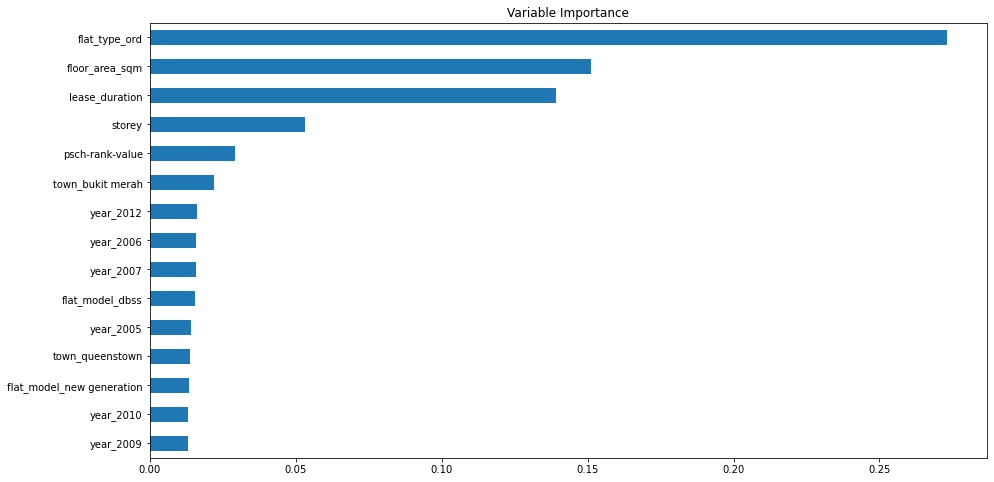

In [44]:
plt.rcParams["figure.figsize"] = (15, 8)
feat_imp = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh')
plt.title('Variable Importance')
plt.show()